Basic pre-processing means making the data ready for Machine Learning.It includes steps like converting categorical data to quantitative data.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
tips=sns.load_dataset("tips")
df=pd.DataFrame(tips)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
# Check the NULL values
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

All zeros indicate there are no null values in any column.

In [6]:
# Statistical Analysis of the data. See below for column "tip"
df.tip.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

In [7]:
# For all quantitative columns
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [13]:
# Converting the Categorical value to quantitative
from sklearn.preprocessing import LabelEncoder
label_encoder_df=LabelEncoder()
df["sex"]=label_encoder_df.fit_transform(df["sex"]) # Replacing the columns with encoded values
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,No,Sun,Dinner,2
1,10.34,1.66,1,No,Sun,Dinner,3
2,21.01,3.50,1,No,Sun,Dinner,3
3,23.68,3.31,1,No,Sun,Dinner,2
4,24.59,3.61,0,No,Sun,Dinner,4


In [15]:
# Changing remaining columns
df["smoker"]=label_encoder_df.fit_transform(df["smoker"])
df["day"]=label_encoder_df.fit_transform(df["day"])
df["time"]=label_encoder_df.fit_transform(df["time"])
df.head() # everything is a number now

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


<AxesSubplot:>

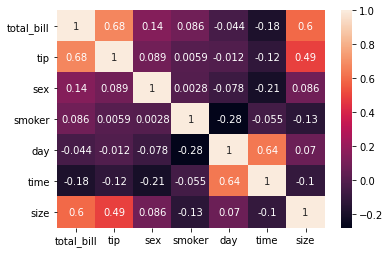

In [19]:
# Check the correlation
corr_matrix=df.corr()
corr_matrix
sns.heatmap(data=corr_matrix, annot=True)

In [21]:
# Split data into target variable and other columns
y=df["tip"]
y.head()

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

In [22]:
# Drop the target column from the dataframe
x=df.drop(["tip"],axis=1)
x.head()

,total_bill,sex,smoker,day,time,size
0,16.99,0,0,2,0,2
1,10.34,1,0,2,0,3
2,21.01,1,0,2,0,3
3,23.68,1,0,2,0,2
4,24.59,0,0,2,0,4


In [24]:
# Split data into Training and Test Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Check the size
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(195, 6) (49, 6) (195,) (49,)
